E/20/280
Lab Task 1: Edge Detection

1.1 Identify the different edges present in an image using Sobel, Laplacian, and Canny edge detection
algorithms, and discuss the differences in their outputs.

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-11351.0..10491.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-10937.0..10465.0].


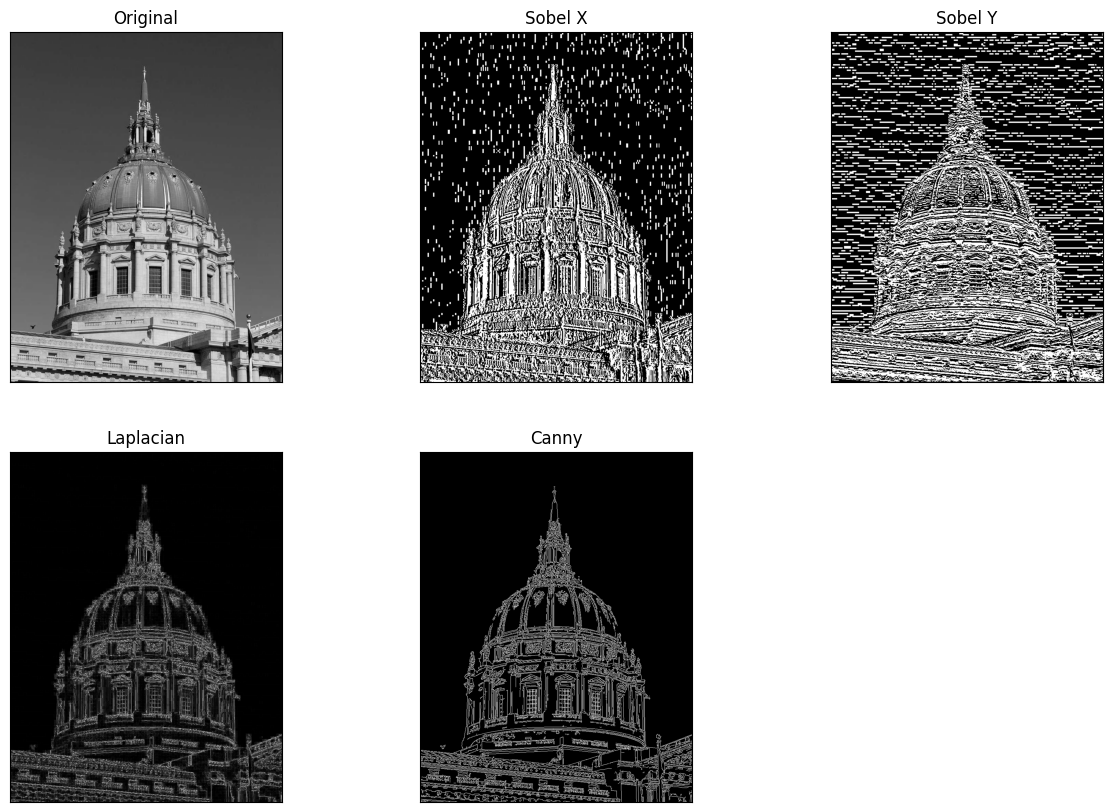

In [ ]:
# load the image
img = cv.imread('edge.jpg')

# apply sobel edge detection
sobelx = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=5)
sobely = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=5)
sobel = np.sqrt(np.square(sobelx) + np.square(sobely))
sobel = np.uint8(sobel)

# apply laplacian edge detection
laplacian = cv.Laplacian(img, cv.CV_64F)
laplacian = np.uint8(np.absolute(laplacian))

# apply canny edge detection
canny = cv.Canny(img, 100, 200)

# display the results
titles = ['Original', 'Sobel X', 'Sobel Y', 'Laplacian', 'Canny']
images = [img, sobelx, sobely, laplacian, canny]

# Define figure size for the subplot
plt.figure(figsize=(15, 10))    # Adjusting the width and height here

for i in range(5):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i]), plt.xticks([]), plt.yticks([])

plt.show()

1.2 Using the provided image jigsaw.jpg, identify the boundary lines of the puzzle piece. Follow
the below steps to obtain the lines:

True

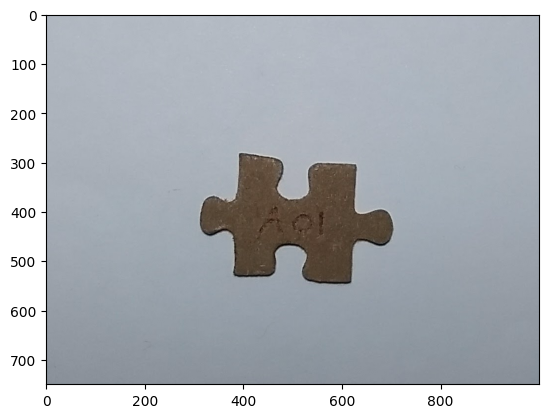

In [5]:
# crop the region containing the puzzle piece using a simple python matrix manipulation
img = cv.imread('jigsaw.jpg')
img = img[1750:2500, 1000:2000]
plt.imshow(img)

# save the cropped image
cv.imwrite("cropped_puzzle_piece.jpg", img)

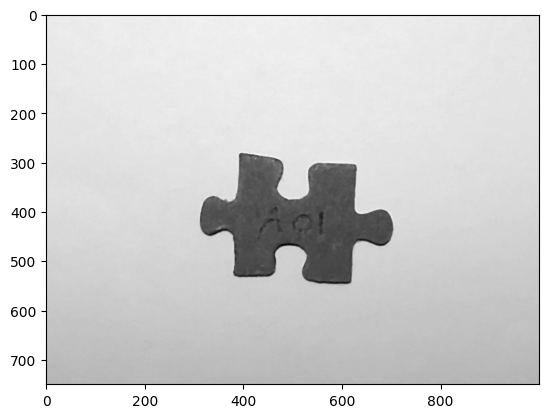

In [7]:
# convert the cropped image to grey scale and remove noise
img = cv.imread('cropped_puzzle_piece.jpg')
grey = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
blurred = cv.medianBlur(grey, 5)
plt.imshow(blurred, cmap='gray')

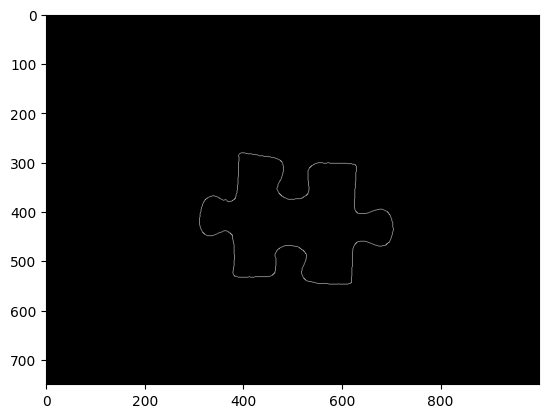

In [10]:
# perform edge detection on the binarized image using canny edge detection
_, thresh = cv.threshold(blurred, 130, 255, cv.THRESH_BINARY)
edges = cv.Canny(thresh, 50, 150)
plt.imshow(edges, cmap='gray')

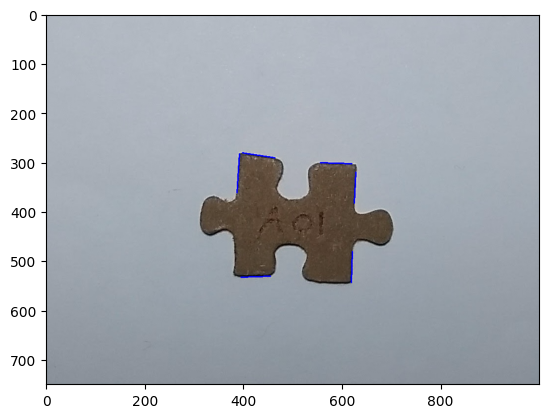

In [12]:
# Apply Hough Line Transform
lines = cv.HoughLinesP(edges, 1, np.pi/180, 50, minLineLength=50, maxLineGap=20)

# Check if lines are detected
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

plt.imshow(img)

Explain the impact of the rho, theta, and threshold parameters of Hough transformation in detecting lines.

The rho (ρ) parameter defines the resolution of the accumulator in pixels. A smaller rho value (e.g., 1 pixel) detects finer details but increases computation, while a larger value (e.g., 2-5 pixels) merges nearby lines for efficiency. Choosing the right rho helps balance accuracy and performance.

The theta (θ) parameter determines the angular resolution in radians. A smaller theta (e.g., np.pi/180) allows detecting lines at precise angles, while a larger value (e.g., np.pi/90) simplifies detection to major orientations. Proper tuning ensures capturing necessary details without excessive computation.

The threshold parameter sets the minimum votes needed for a line to be valid. A lower threshold detects more lines, including weak ones, while a higher value captures only strong, prominent edges. Adjusting it helps reduce noise while ensuring essential lines are detected.

Lab Task 2: Corner Detection

2.1 Apply Harris, Shi-Tomasi, and SIFT algorithms on an image to identify corners and discuss the differences in these algorithms.

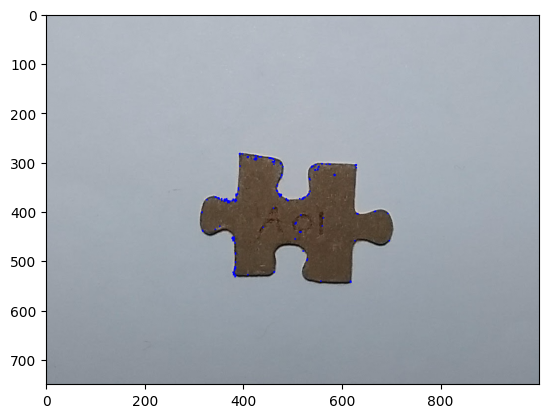

In [14]:
# Load the image
img = cv.imread('cropped_puzzle_piece.jpg')

# Convert the image to grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Convert grayscale image to float32 (required for Harris corner detection)
gray = np.float32(gray)

# Apply Harris Corner Detection
# Parameters: (input image, block size, Sobel kernel size, Harris detector free parameter)
dst = cv.cornerHarris(gray, 2, 3, 0.04)

# Dilate the detected corners to enhance visibility
dst = cv.dilate(dst, None)

# Mark corners in red (where response is greater than 1% of max response)
img[dst > 0.01 * dst.max()] = [0, 0, 255]

# Display the result
plt.imshow(img)

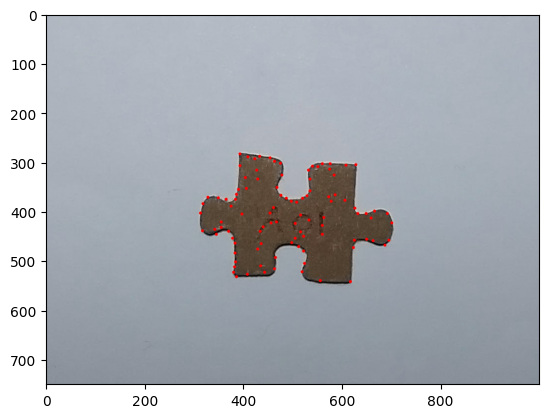

In [15]:
# Load the image
img = cv.imread('cropped_puzzle_piece.jpg')

# Convert the image to grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Apply Shi-Tomasi Corner Detection
# Parameters: (input image, max corners, quality level, min distance between corners)
corners = cv.goodFeaturesToTrack(gray, 100, 0.01, 10)

# Convert the corner coordinates to integer values
corners = np.intp(corners)

# Draw small circles at detected corner points
for corner in corners:
    x, y = corner.ravel()  # Flatten the array
    cv.circle(img, (x, y), 3, 255, -1)  # Draw a white circle at the corner

# Display the result
plt.imshow(img)

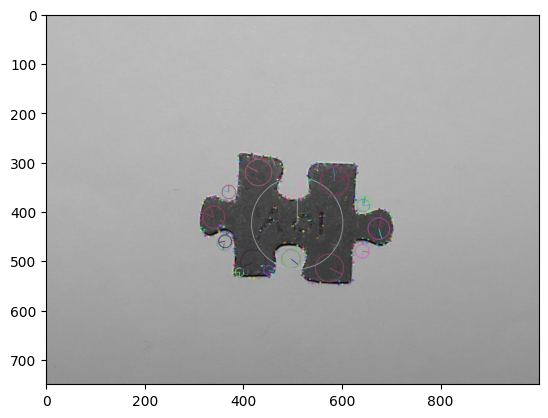

In [16]:
# Load the image
img = cv.imread('cropped_puzzle_piece.jpg')

# Convert the image to grayscale (SIFT works on grayscale images)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Create a SIFT (Scale-Invariant Feature Transform) detector
sift = cv.SIFT_create()

# Detect keypoints in the grayscale image
kp = sift.detect(gray, None)

# Draw detected keypoints on the original grayscale image
# The flag DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS draws the size and orientation of keypoints
img = cv.drawKeypoints(gray, kp, None, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the result
plt.imshow(img)

1. Harris Corner Detection:

  The Harris Corner Detector is an algorithm that detects corners by looking for significant changes in intensity in multiple directions.

2. Shi-Tomasi Corner Detector:

  The Shi-Tomasi Corner Detector improves on the Harris Detector by considering only the minimum eigenvalue, making it more accurate for certain applications.

3. Scale-Invariant Feature Transform (SIFT):

  While Harris and Shi-Tomasi detectors are rotation-invariant (because corners remain corners in rotated image also), they are sensitive to scaling.

2.2 Using the provided image jigsaw.jpg, identify the corners present in the puzzle piece

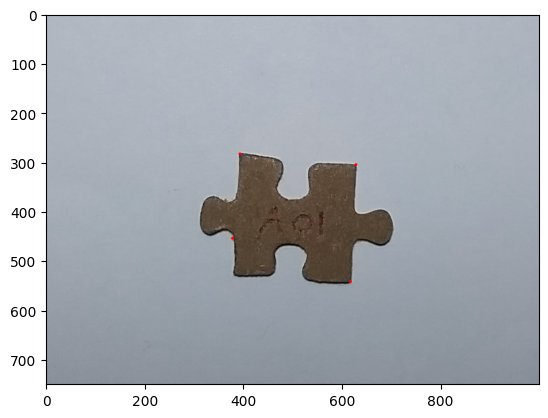

In [17]:
# Load the image
img = cv.imread('cropped_puzzle_piece.jpg')

# Convert the image to grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Apply Shi-Tomasi Corner Detection
# Parameters: (input image, max corners, quality level, min distance between corners)
corners = cv.goodFeaturesToTrack(gray, 4, 0.01, 100)

# Convert the corner coordinates to integer values
corners = np.intp(corners)

# Draw small circles at detected corner points
for corner in corners:
    x, y = corner.ravel()  # Flatten the array
    cv.circle(img, (x, y), 3, 255, -1)  # Draw a white circle at the corner

# Display the result
plt.imshow(img)